In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import xlwt
import numpy as np
import array 
import operator
from math import *
from scipy.integrate import quad
import math

Equation for Ay

[0.08898690558906475, 0.1438396109761385, 0.16035730360736775, 0.16625835413082096, 0.16872317222596092, 0.16986207396805636, 0.17042152591741602, 0.1707054782191759, 0.17085103625442516, 0.17092480656724385, 0.1709608971169827, 0.1709773920186895, 0.1709840517487505, 0.17098613741073454, 0.17098640670827778, 0.17098619920503427, 0.17098604645975232, 0.17098602372807228, 0.1709859546600351, 0.17098552661831207, 0.17098434425627648]


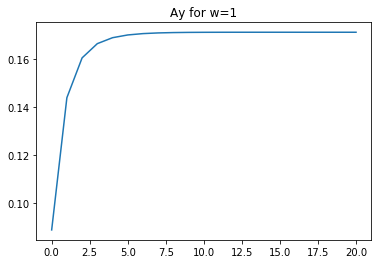

In [4]:
from scipy.integrate import dblquad
w=.1
delta=.1
p=.75
D_max=32

ay=[]
def integrandyx(D):
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6-.016*(D/D_max)**8-.01*(D/D_max)**10)
    return (p*(4/pi)*(x*(D**-3 * ((.5*D)-w)**2)))    

def integrandyy(D):
    u_max=((-.5*w*(w**2+delta**2)+
       (.5*math.sqrt((w**2*(w**2 + delta**2)**2)-
                    ((w**2+delta**2)*((w**2+delta**2)**2-delta**2*D**2)))))/(w**2+delta**2))
    G_first= D**-3 *(math.sqrt(D**2-(w**2+delta**2))*(delta/math.sqrt(w**2+delta**2))*u_max-w*u_max-u_max**2)
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6-.016*(D/D_max)**8-.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_first))

for i in range(1,22):
    initalyx=2*w
    finalyx=(w**2 + delta**2)/w
    finalyy=D_max
    if delta>w:
        ansyx, err = quad(integrandyx, initalyx, finalyx)
        ansyy, err = quad(integrandyy,finalyx, D_max)
        y=ansyx + ansyy
        ay.append(y)  
    else:
        ansyy, err = quad(integrandyy,finalyx, D_max)
        ay.append(ansyy)
       
    
    delta=delta+.1
plt.title('Ay for w=1')
print(ay)

plt.plot(ay)

Equation of Ax

In [ ]:
df = pd.DataFrame(columns=['.1', '.2', '.3', '.4', '.5', '.6', '.7', '.8', '.9', '1', '1.1', '1.2', '1.3', '1.4', '1.6', '1.7', '1.8', '1.9', '2'])

In [ ]:
from scipy.integrate import dblquad
w=1.1
delta=.1
p=.75
D_max=32

ay=[]
def integrandyx(D):
    G_fourth=((D**-3)*(((pi/8)*D**2)-(w*math.sqrt((.25*D**2)-w**2))-((.25*D**2)*(math.asin((2*w)/D)))))
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6+.016*(D/D_max)**8+.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_fourth))    

def integrandyy(D):
    u_max=((-.5*w*(w**2+delta**2)+
       (.5*math.sqrt((w**2*(w**2 + delta**2)**2)-
                    ((w**2+delta**2)*((w**2+delta**2)**2-delta**2*D**2)))))/(w**2+delta**2))
    G_first= (D**-3) *(math.sqrt(D**2-(w**2+delta**2))*(delta/math.sqrt(w**2+delta**2))*u_max-w*u_max-u_max**2)
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6+.016*(D/D_max)**8+.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_first))
            
def integrandxsmall(D):
    u_max=((-.5*w*(w**2+delta**2)+
   (.5*math.sqrt((w**2*(w**2 + delta**2)**2)-
                 ((w**2+delta**2)*((w**2+delta**2)**2-delta**2*D**2)))))/(w**2+delta**2))
    magic=(w+u_max)/(.5*D)
    if -1<magic<1:
        magic=(w+u_max)/(.5*D)
    else:
        magic=0
    marianne=(2*w)/D
    if -1<marianne<1:
         marianne=(2*w)/D
    else:
        marianne=0
    G_second=((D**-3)*(delta-(math.sqrt(D**2-(w**2+delta**2))*
                  (w/math.sqrt(w**2+delta**2))*u_max
                  +(u_max+w)*math.sqrt(.25*D**2-(w+u_max)**2)-(w*math.sqrt(np.abs(.25*D**2-w**2)))
                      +((.25*D**2)*math.asin(magic)-(.25*D**2)*math.asin((marianne))))))
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6+.016*(D/D_max)**8+.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_second))

for i in range(1,22):
    initalyx=2*w
    finalyx=(w**2 + delta**2)/w
    finalyy=D_max
    print("for delta=" , delta)
    if delta>w:
        ansyx, err = quad(integrandyx, initalyx, finalyx)
        ansyy, err = quad(integrandyy,finalyx, D_max)
        y=ansyx + ansyy
        ay.append(y)
        print("Ax is =", y)
    else:
        ansyy, err = quad(integrandxsmall,finalyx, D_max)
        x=np.abs(ansyy*10**-1)
        ay.append(x)
        print("Ax is =a" , x)
    
    delta=delta+.1
print(ay)
plt.plot(ay)

In [ ]:
df=pd.read_excel(r'C:\Users\49173\Desktop\Personal_files\MB\ay.xlsx')

In [ ]:
for i in range(-2,21):
    df.loc[10,i]=ay[i]

In [2]:
df = pd.DataFrame()

In [ ]:
df.to_excel(r'C:\Users\49173\Desktop\Personal_files\MB\17.xlsx')

In [ ]:
df=d

In [ ]:
from scipy.integrate import dblquad
w=.1
delta=.1
p=.75
D_max=32

ay=[]
def integrandyx(D):
    G_fourth=((D**-3)*(((pi/8)*D**2)-(w*math.sqrt((.25*D**2)-w**2))-((.25*D**2)*(math.asin((2*w)/D)))))
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6+.016*(D/D_max)**8+.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_fourth))    

def integrandyy(D):
    u_max=((-.5*w*(w**2+delta**2)+
       (.5*math.sqrt((w**2*(w**2 + delta**2)**2)-
                    ((w**2+delta**2)*((w**2+delta**2)**2-delta**2*D**2)))))/(w**2+delta**2))
    G_first= (D**-3) *(math.sqrt(D**2-(w**2+delta**2))*(delta/math.sqrt(w**2+delta**2))*u_max-w*u_max-u_max**2)
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6+.016*(D/D_max)**8+.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_first))
            
def integrandxsmall(D):
    u_max=((-.5*w*(w**2+delta**2)+
   (.5*math.sqrt((w**2*(w**2 + delta**2)**2)-
                 ((w**2+delta**2)*((w**2+delta**2)**2-delta**2*D**2)))))/(w**2+delta**2))
    magic=(w+u_max)/(.5*D)
    if -1<magic<1:
        magic=(w+u_max)/(.5*D)
    else:
        magic=0
    marianne=(2*w)/D
    if -1<marianne<1:
         marianne=(2*w)/D
    else:
        marianne=0
    G_second=((D**-3)*(delta-(math.sqrt(D**2-(w**2+delta**2))*
                  (w/math.sqrt(w**2+delta**2))*u_max
                  +(u_max+w)*math.sqrt(.25*D**2-(w+u_max)**2)-(w*math.sqrt(np.abs(.25*D**2-w**2)))
                      +((.25*D**2)*math.asin(magic)-(.25*D**2)*math.asin((marianne))))))
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6+.016*(D/D_max)**8+.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_second))
for intial in range(0,20):

    for i in range(1,22):
        initalyx=2*w
        finalyx=(w**2 + delta**2)/w
        finalyy=D_max
        #print("for delta=" , delta)
        if delta>w:
            ansyx, err = quad(integrandyx, initalyx, finalyx)
            ansyy, err = quad(integrandyy,finalyx, D_max)
            y=ansyx + ansyy
            ay.append(y)
            #print("Ax is =", y)
        else:
            ansyy, err = quad(integrandxsmall,finalyx, D_max)
            x=np.abs(ansyy*10**-1)
            ay.append(x)
            #print("Ax is =a" , x)
         
        delta=delta+.1
    delta=.1
    w=w+.1
    print("for ax")
    print(ay)
    df[intial]=ay
    ay.clear()
    #plt.plot(ay)

In [ ]:
df

In [ ]:
df.to_excel(r'C:\Users\49173\Desktop\Personal_files\MB\ax.xlsx')

In [6]:
from scipy.integrate import dblquad
w=.1
delta=.1
p=.75
D_max=32

ay=[]
def integrandyx(D):
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6-.016*(D/D_max)**8-.01*(D/D_max)**10)
    return (p*(4/pi)*(x*(D**-3 * ((.5*D)-w)**2)))    

def integrandyy(D):
    u_max=((-.5*w*(w**2+delta**2)+
       (.5*math.sqrt((w**2*(w**2 + delta**2)**2)-
                    ((w**2+delta**2)*((w**2+delta**2)**2-delta**2*D**2)))))/(w**2+delta**2))
    G_first= D**-3 *(math.sqrt(D**2-(w**2+delta**2))*(delta/math.sqrt(w**2+delta**2))*u_max-w*u_max-u_max**2)
    x=(.727*(D/D_max)**.5 -(D/D_max)**2+.144*(D/D_max)**4 +.036*(D/D_max)**6-.016*(D/D_max)**8-.01*(D/D_max)**10)
    return (p*(4/pi)*(x*G_first))
for inital in range(0,20):
     
    for i in range(1,22):
        initalyx=2*w
        finalyx=(w**2 + delta**2)/w
        finalyy=D_max
        if delta>w:
            ansyx, err = quad(integrandyx, initalyx, finalyx)
            ansyy, err = quad(integrandyy,finalyx, D_max)
            y=ansyx + ansyy
            ay.append(y)  
        else:
            ansyy, err = quad(integrandyy,finalyx, D_max)
            ay.append(ansyy)
        delta=delta+.1
    delta=.1
    w=w+.1
    df[inital]=ay
    ay.clear()

print(df)



          0         1         2         3         4         5         6   \
0   0.088987  0.029434  0.013972  0.009788  0.009025  0.009471  0.010374   
1   0.143840  0.078219  0.041377  0.023754  0.015488  0.011690  0.010116   
2   0.160357  0.110017  0.070530  0.044640  0.029094  0.020041  0.014861   
3   0.166258  0.126794  0.091809  0.064429  0.044826  0.031585  0.022906   
4   0.168723  0.135664  0.105671  0.079902  0.059339  0.043774  0.032485   
5   0.169862  0.140548  0.114499  0.091132  0.071199  0.054963  0.042197   
6   0.170422  0.143352  0.120155  0.099079  0.080382  0.064388  0.051126   
7   0.170705  0.145016  0.123831  0.104670  0.087329  0.072005  0.058816   
8   0.170851  0.146030  0.126258  0.108614  0.092533  0.078036  0.065221   
9   0.170925  0.146658  0.127884  0.111412  0.096419  0.082757  0.070461   
10  0.170961  0.147050  0.128985  0.113411  0.099323  0.086434  0.074700   
11  0.170977  0.147297  0.129737  0.114847  0.101498  0.089290  0.078106   
12  0.170984

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.088987,0.029434,0.013972,0.009788,0.009025,0.009471,0.010374,0.011442,0.012550,0.013645,0.014701,0.015708,0.016664,0.017568,0.018422,0.019228,0.019989,0.020709,0.021389,0.022031
1,0.143840,0.078219,0.041377,0.023754,0.015488,0.011690,0.010116,0.009701,0.009908,0.010455,0.011185,0.012009,0.012875,0.013750,0.014618,0.015465,0.016287,0.017078,0.017838,0.018565
2,0.160357,0.110017,0.070530,0.044640,0.029094,0.020041,0.014861,0.011990,0.010517,0.009905,0.009832,0.010096,0.010574,0.011184,0.011872,0.012605,0.013357,0.014115,0.014866,0.015603
3,0.166258,0.126794,0.091809,0.064429,0.044826,0.031585,0.022906,0.017319,0.013799,0.011659,0.010448,0.009865,0.009710,0.009849,0.010186,0.010659,0.011222,0.011842,0.012497,0.013170
4,0.168723,0.135664,0.105671,0.079902,0.059339,0.043774,0.032485,0.024511,0.018980,0.015211,0.012705,0.011102,0.010148,0.009661,0.009510,0.009601,0.009867,0.010258,0.010737,0.011276
5,0.169862,0.140548,0.114499,0.091132,0.071199,0.054963,0.042197,0.032484,0.025266,0.019991,0.016199,0.013525,0.011690,0.010484,0.009750,0.009369,0.009255,0.009339,0.009572,0.009916
6,0.170422,0.143352,0.120155,0.099079,0.080382,0.064388,0.051126,0.040405,0.031965,0.025456,0.020517,0.016822,0.014105,0.012148,0.010782,0.009874,0.009321,0.009041,0.008974,0.009070
7,0.170705,0.145016,0.123831,0.104670,0.087329,0.072005,0.058816,0.047713,0.038547,0.031144,0.025274,0.020687,0.017152,0.014468,0.012465,0.011007,0.009983,0.009303,0.008896,0.008706
8,0.170851,0.146030,0.126258,0.108614,0.092533,0.078036,0.065221,0.054113,0.044645,0.036697,0.030150,0.024844,0.020603,0.017255,0.014648,0.012650,0.011148,0.010052,0.009283,0.008781
9,0.170925,0.146658,0.127884,0.111412,0.096419,0.082757,0.070461,0.059565,0.050055,0.041863,0.034894,0.029062,0.024252,0.020336,0.017185,0.014680,0.012718,0.011208,0.010072,0.009245


In [8]:
df.to_excel(r'C:\Users\49173\Desktop\Personal_files\MB\ay.xlsx')